## Data Analysis
### Run details:
+ NS_max_iter 10000000 
+ NS_sampling_efficiency 0.15
+ NS_evidence_tolerance 0.8
+ NS_n_live_points 1000 


In [1]:
#Show plots inline, and load main getdist plot module and samples class
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist, IPython
import pylab as plt
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
#matplotlib 2 doesn't seem to work well without usetex on
plt.rcParams['text.usetex']=True

import numpy as np 

GetDist Version: 1.1.3, Matplotlib version: 3.3.4


In [2]:
names_planck  = ['omega_cdm', 'S_8', 'omega_b', 'n_s', 'h', 'Omega_m', 'sigma8']
labels_planck = [r'\omega_{\rm{cdm}}', r'S_{\rm{8}}', r'\omega_{\rm{b}}', r'n_{\rm{s}}',
              'h', r'\Omega_{\rm{m}}', r'\sigma_{\rm{8}}']

names_k1k  = ['omega_cdm', 'S_8', 'omega_b', 'n_s', 'h', 'Omega_m', 'sigma8'] #, 'A_IA']
labels_k1k = [r'\omega_{\rm{cdm}}', r'S_{\rm{8}}', r'\omega_{\rm{b}}', r'n_{\rm{s}}',
              'h', r'\Omega_{\rm{m}}', r'\sigma_{\rm{8}}'] #, r'A_{\rm{IA}}']

names_comp = ['S8_geo', 'Omega_m_geo', 'sigma8_geo', 'S8_gro', 'Omega_m_gro', 'sigma8_gro']
labels_comp = [r'S_{\rm{8}}^{\rm{geo}}',  r'\Omega_{\rm{m}}^{\rm{geo}}', r'\sigma_{\rm{8}}^{\rm{geo}}',
               r'S_{\rm{8}}^{\rm{gro}}',  r'\Omega_{\rm{m}}^{\rm{gro}}', r'\sigma_{\rm{8}}^{\rm{gro}}']

In [3]:
planck1 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_1.txt')
planck2 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_2.txt')
planck3 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_3.txt')
planck4 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_4.txt')

planck_tot = np.concatenate((planck1, planck2, planck3, planck4), axis=0)

In [4]:
planck_params = []
for item in planck_tot:
    planck_params.append([item[3], item[35], item[2],  item[7], item[29]/100, item[31], item[34]])
planck_params = np.array(planck_params)
planck= MCSamples(samples=planck_params, names = names_planck, labels = labels_planck, label= 'Planck 2018',
                    weights=np.transpose(planck_tot)[0],loglikes=np.transpose(planck_tot)[1])

Removed no burn in


[0.7702132, 0.7761267, 0.7779783, 0.7698161, 0.7765731, 0.7689857]
[[0.0453997225389523, 0.0075573072455086265], [0.022132635595382366, 0.009851148900061335], [0.020511026009843114, 0.014840526867385795], [0.01858954227068177, 0.013828272762374305], [0.023163595621384814, 0.009214896948228302], [0.015888168500170163, 0.011889849437697109]]
[0.6544201, 0.9664795, 0.8933472, 0.6593804, 0.9110773, 0.7957825]
[[0.11997706033611133, 0.18262865896399416], [0.14474845045925155, 0.02715402529104538], [0.32444366729996044, 0.09274054781569407], [0.05829712755623029, 0.23983672983824345], [0.10472776921389915, 0.11375416857191778], [0.054757547983244836, 0.02910744977242563]]


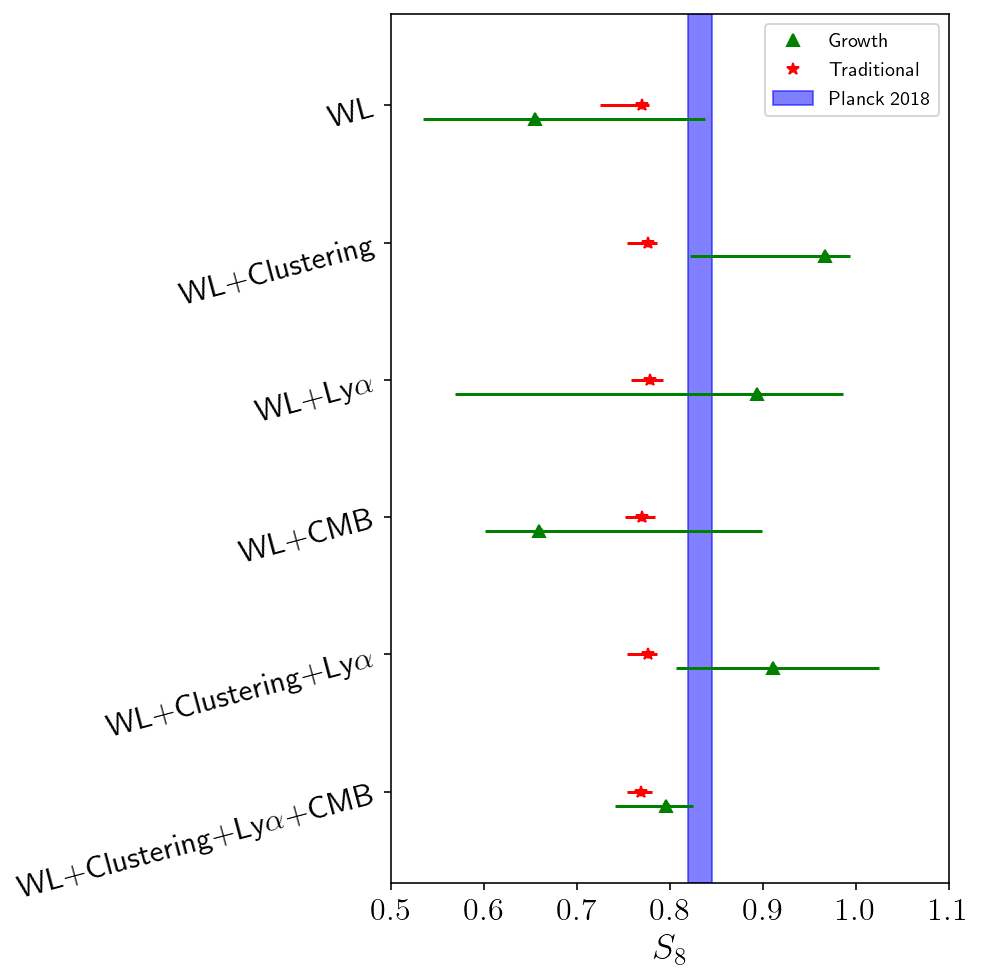

In [5]:
y = [0,3,6,9,12,15]
y_1 = [0.3, 3.3 ,6.3 ,9.3, 12.3, 15.3 ]
#y_2 = [-0.3, 2.7 ,5.7 ,8.7, 11.7, 14.7 ]
my_yticks = ['WL', 'WL+Clustering', r'WL+Ly$\alpha$', 'WL+CMB', 
             r'WL+Clustering+Ly$\alpha$', r'WL+Clustering+Ly$\alpha$+CMB']

#S8_gro = np.array([0.65442, 0.96648, 0.893347, 0.65938, 0.911077, 0.795782])
#S8_geo = np.array([0.703941, 0.675769, 0.373312, 0.117259, 0.374523, 0.703867])
#S8 = np.array([0.770213, 0.776127, 0.777978, 0.769816, 0.776573, 0.768986])

#S8_geo_err =  np.array([[1.0071850E-01,  1.2999340E+00], [1.0039480E-01,  1.2999760E+00],
#                        [1.0012820E-01,  1.2996810E+00], [1.0023780E-01, 1.2999260E+00],
#                       [1.0000050E-01, 1.2999040E+00 ],  [1.0001790E-01,  1.2997520E+00]])
#S8_gro_err =  np.array([[4.4878540E-01,  1.2508120E+00], [6.4431390E-01,  1.0838300E+00],
#                        [5.1935200E-01,  1.2962430E+00], [5.8787210E-01,  1.2937020E+00],
#                       [6.3191590E-01,  1.1467990E+00], [6.7021580E-01,  8.7405270E-01]])
#S8_err = np.array([[7.2918116E-01,  7.8117537E-01], [7.5252049E-01,  7.8464064E-01],
#                    [7.2850430E-01,  8.2902080E-01], [7.3006600E-01,  8.2450160E-01],
#                  [7.2496930E-01,  8.1705610E-01 ], [7.3528860E-01, 8.1752390E-01] ])

S8 = [0.7702132, 0.7761267,  0.7779783, 0.7698161, 0.7765731, 0.7689857]
S8_err = [[0.7248134774610477, 0.7777705072455087], [0.7539940644046176, 0.7859778489000613],
          [0.7574672739901569, 0.7928188268673858], [0.7512265577293182, 0.7836443727623743],
          [0.7534095043786152, 0.7857879969482283], [0.7530975314998298, 0.7808755494376971]]

S8_gro = [0.6544201, 0.9664795, 0.8933472, 0.6593804, 0.9110773, 0.7957825]
S8_gro_err = [[0.5344430396638886, 0.8370487589639941], [0.8217310495407485, 0.9936335252910454],
              [0.5689035327000396, 0.9860877478156941], [0.6010832724437697, 0.8992171298382434],
              [0.8063495307861008, 1.0248314685719178], [0.7410249520167551, 0.8248899497724256]]

#S8_geo = [0.7039409, 0.6757689, 0.3733119,  0.1172591, 0.3745226, 0.7038674]
#S8_geo_err = [[0.4041885013768105, 1.1057811095371746], [0.49205441597769173, 1.2855968497311703],
#              [0.2570085236391014, 1.0118347053914807], [0.10967673029416355, 0.9112997968368074], 
#              [0.23453782770369722, 1.0016544641322662], [0.17988044175817786, 0.97356392365632]]

for counter, entry in enumerate(S8_err):
    entry[0] = S8[counter]-entry[0]
    entry[1] = -S8[counter]+entry[1]

for counter, entry in enumerate(S8_gro_err):
    entry[0] = S8_gro[counter]-entry[0]
    entry[1] = -S8_gro[counter]+entry[1]
    
#for counter, entry in enumerate(S8_geo_err):
#    entry[0] = S8_geo[counter]-entry[0]
#    entry[1] = -S8_geo[counter]+entry[1]

    
print(S8)
print(S8_err)
#print(S8_geo)
#print(S8_geo_err)
print(S8_gro)
print(S8_gro_err)



    
plt.figure(figsize=(5,8))
    

plt.xlabel(r'$S_{\rm{8}}$', fontsize=18)

plt.errorbar( S8, y, xerr=np.transpose(S8_err), fmt='r.')
#plt.errorbar(S8_geo, y_1,   xerr=np.transpose(S8_geo_err), fmt='k.')
plt.errorbar( S8_gro, y_1,  xerr=np.transpose(S8_gro_err), fmt='g.')

#plt.plot( S8_geo, y_1, 'k^', label='Geometry')
plt.plot( S8_gro, y_1, 'g^', label='Growth')
plt.plot( S8, y, 'r*', label='Traditional')

plt.axvspan(0.832 - 0.013, 0.832 + 0.013, alpha = 0.5, color='b',  label='Planck 2018')

plt.legend()

plt.axis([0.5, 1.1,  17,-2,])


plt.yticks(y, my_yticks, fontsize=16)
plt.yticks(rotation=15)

plt.xticks(fontsize=16)


plt.show()

In [6]:
a =[ 1, 2,3 ,4  ,5 ]
a[2:]

[3, 4, 5]

In [7]:
def munch_1cosmo_appendix(path, names, labels, name):
    chain = np.loadtxt(path+'/chain_NS__accepted.txt')
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights = cols[0]
    param_cols = cols[2:9]
    param_rows = np.transpose(param_cols)
    samples = MCSamples(samples=param_rows, names=names, labels=labels, label = name,
                        weights=weights, loglikes=loglikes)
    return samples

In [8]:
def munch_1cosmo(path, names, labels, name):
    chain = np.loadtxt(path+'/chain_NS__accepted.txt')
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights = cols[0]
    param_cols = np.append(cols[2:7], cols[-2:], axis=0)
    #param_cols = np.append(param_cols, [cols[8]], axis=0)
    param_rows = np.transpose(param_cols)
    samples = MCSamples(samples=param_rows, names=names, labels=labels, label = name,
                        weights=weights, loglikes=loglikes)
    return samples

In [9]:
def munch_2cosmo(path, names, labels, name):
    chain = np.loadtxt(path+'/chain_NS__accepted.txt')
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights =  cols[0]
    param_cols_gro = np.append(cols[2:7], cols[-4:-2], axis=0)
    #param_cols_gro = np.append(param_cols_gro, [cols[13]], axis=0)
    param_rows_gro = np.transpose(param_cols_gro)
    param_cols_geo = np.append(cols[7:12], cols[-2:], axis=0)
    #param_cols_geo = np.append(param_cols_geo, [cols[13]], axis=0)
    param_rows_geo = np.transpose(param_cols_geo)
        
    samples_gro = MCSamples(samples=param_rows_gro, names=names, labels=labels, label=name+' gro', 
                        weights=weights, loglikes=loglikes)
    samples_geo = MCSamples(samples=param_rows_geo, names=names, labels=labels, label=name+' geo',
                        weights=weights, loglikes=loglikes)
    
    return samples_gro, samples_geo
    

In [10]:
def munch_comp(path, names, labels, name):
    chain = np.loadtxt(path+'/chain_NS__accepted.txt')
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights =  cols[0]
    param_cols_gro = np.append([cols[3]], cols[-4:-2], axis=0)
    param_cols_geo = np.append([cols[8]], cols[-2:], axis=0)
    comp_cols = np.append(param_cols_geo, param_cols_gro, axis=0)
    comp_rows = np.transpose(comp_cols)
        
    samples = MCSamples(samples=comp_rows, names=names, labels=labels, label=name+' gro', 
                        weights=weights, loglikes=loglikes)
    return samples
    

In [11]:
BOSS = munch_1cosmo_appendix('Cl', names_planck, labels_planck, 'Clustering')
Lya = munch_1cosmo_appendix('Ly', names_planck, labels_planck, r'Ly$\alpha$')
CMB = munch_1cosmo_appendix('CMB', names_planck, labels_planck, 'CMB')

Removed no burn in
Removed no burn in
Removed no burn in


In [12]:
K1K = munch_1cosmo('K1K_1c', names_k1k, labels_k1k, 'WL')
K1K_Cl = munch_1cosmo('K1K_Cl_1c', names_k1k, labels_k1k, 'WL+Clustering')
K1K_Ly = munch_1cosmo('K1K_Ly_1c', names_k1k, labels_k1k, r'WL+Ly$\alpha$')
K1K_CMB = munch_1cosmo('K1K_CMB_1c', names_k1k, labels_k1k, 'WL+CMB')
K1K_ClLy = munch_1cosmo('K1K_ClLy_1c', names_k1k, labels_k1k, r'WL+Clustering+Ly$\alpha$')
K1K_ClLyC = munch_1cosmo('K1K_ClLyC_1c', names_k1k, labels_k1k, r'WL+Clustering+Ly$\alpha$+CMB')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [13]:
K1K_gro, K1K_geo = munch_2cosmo('K1K_bp', names_k1k, labels_k1k, 'WL')
K1K_Cl_gro, K1K_Cl_geo = munch_2cosmo('K1K_Cl', names_k1k, labels_k1k, 'WL+Clustering')
K1K_Ly_gro, K1K_Ly_geo = munch_2cosmo('K1K_Ly', names_k1k, labels_k1k, r'WL+Ly$\alpha$')
K1K_CMB_gro, K1K_CMB_geo  = munch_2cosmo('K1K_CMB', names_k1k, labels_k1k, 'WL+CMB')
K1K_ClLy_gro, K1K_ClLy_geo = munch_2cosmo('K1K_ClLy', names_k1k, labels_k1k, r'WL+Clustering+Ly$\alpha$')
K1K_ClLyC_gro, K1K_ClLyC_geo = munch_2cosmo('K1K_ClLyC', names_k1k, labels_k1k, r'WL+Clustering+Ly$\alpha$+CMB')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [14]:
K1K_comp = munch_comp('K1K', names_comp, labels_comp, 'K1K')
K1K_Cl_comp = munch_comp('K1K_Cl', names_comp, labels_comp, 'K1K+Clustering')
K1K_ClLy_comp = munch_comp('K1K_ClLy', names_comp, labels_comp, 'K1K+Clustering+Lya')
K1K_ClLyC_comp = munch_comp('K1K_ClLyC', names_comp, labels_comp, 'K1K+Clustering+Lya+CMB')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [15]:
K1K_comp.getCorrelationMatrix()

array([[ 1.        ,  0.0517297 ,  0.96009513, -0.03343126,  0.03102471,
        -0.05137833],
       [ 0.0517297 ,  1.        , -0.20167608, -0.57759097,  0.47983392,
        -0.89980927],
       [ 0.96009513, -0.20167608,  1.        ,  0.11795668, -0.09373803,
         0.18754551],
       [-0.03343126, -0.57759097,  0.11795668,  1.        ,  0.3144078 ,
         0.60184654],
       [ 0.03102471,  0.47983392, -0.09373803,  0.3144078 ,  1.        ,
        -0.55000343],
       [-0.05137833, -0.89980927,  0.18754551,  0.60184654, -0.55000343,
         1.        ]])

# Comp plots

In [16]:
lims4 =[0.15, 0.5, 0.15, 0.5]
lims5 =[0.05, 1.45, 0.05, 1.45]
lims6 =[0.05, 1.3, 0.05, 1.3]

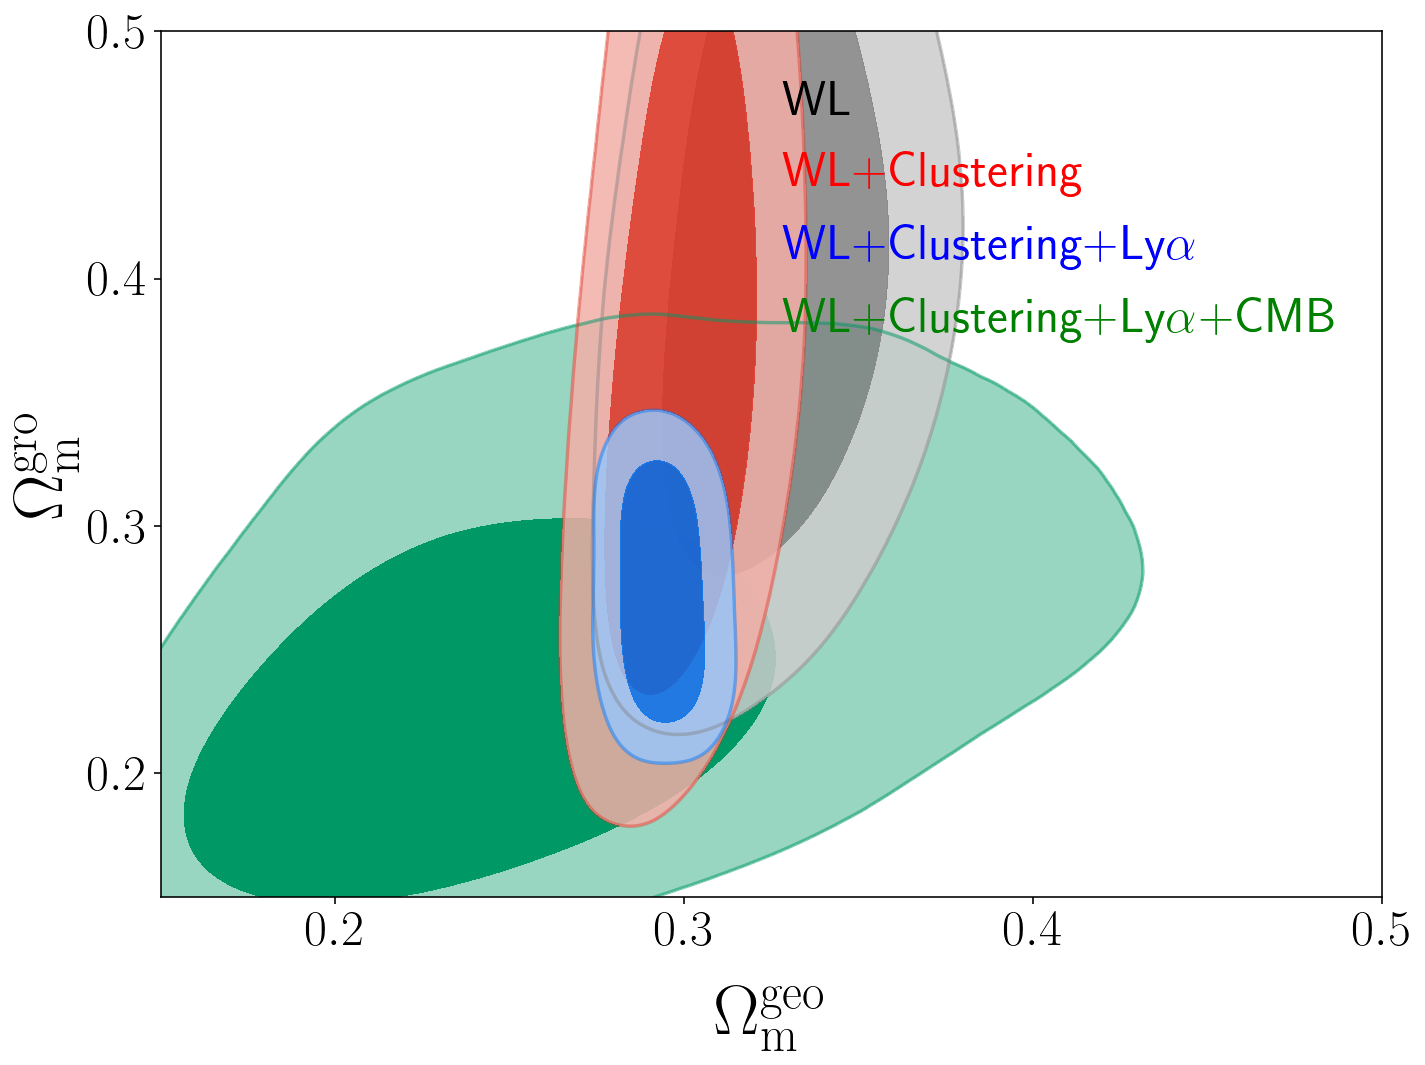

In [17]:
g = plots.get_single_plotter(width_inch=10)
g.settings.axes_fontsize=25
g.settings.axes_labelsize = 35
g.settings.legend_fontsize = 25
g.add_legend(['WL', 'WL+Clustering', r'WL+Clustering+Ly$\alpha$', r'WL+Clustering+Ly$\alpha$+CMB'], 
             colored_text=['green', 'black', 'red','blue'])
g.plot_2d([K1K_comp, K1K_Cl_comp, K1K_ClLy_comp, K1K_ClLyC_comp],
          'Omega_m_geo', 'Omega_m_gro', lims= lims4, filled=True);

g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/wmwm.png')

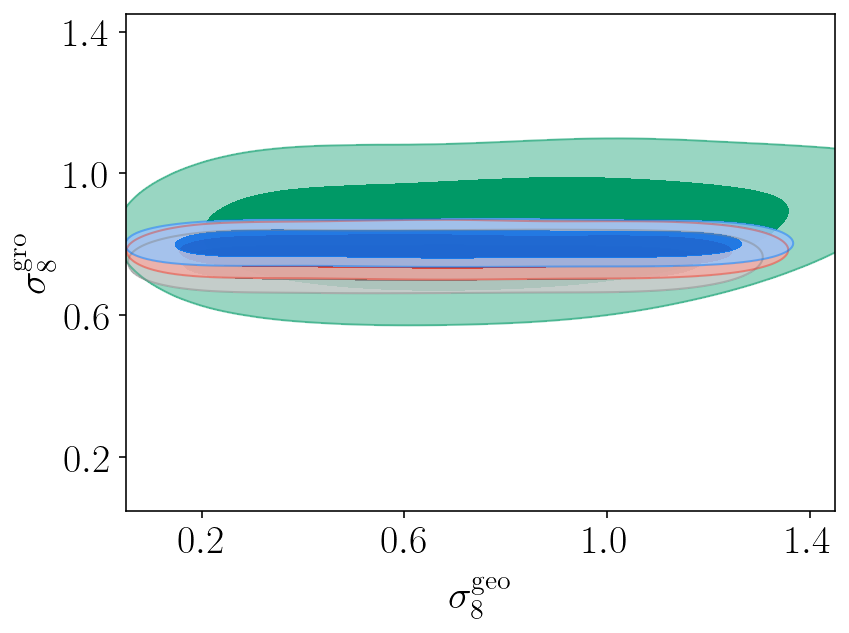

In [18]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([K1K_comp, K1K_Cl_comp, K1K_ClLy_comp, K1K_ClLyC_comp],
          'sigma8_geo', 'sigma8_gro', lims= lims5, filled=True);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/sigsig.png')

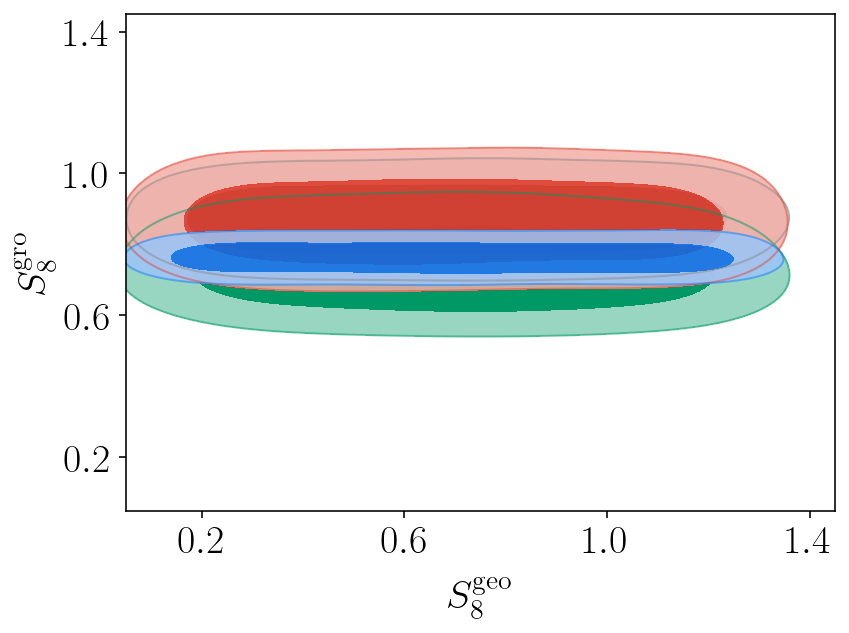

In [19]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([K1K_comp, K1K_Cl_comp, K1K_ClLy_comp, K1K_ClLyC_comp],
          'S8_geo', 'S8_gro', lims= lims5, filled=True);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/S8S8.png')

# 1D&2D Plots

In [20]:
lims1 = [0.15, 0.5, 0.4, 1.5]
lims2 = [0.15, 0.5, 0.65, 0.82]
lims3 = [0., 0.7]
lims4 = [0, 1.5]
lims5 = [ 0.64,   0.82]

plot = {'K1K': [K1K_gro, K1K_geo, K1K, planck],
         'K1K_Cl': [K1K_Cl_gro, K1K_Cl_geo, K1K_Cl, planck],
         'K1K_ClLy':[K1K_ClLy_gro, K1K_ClLy_geo, K1K_ClLy, planck],
         'K1K_ClLyC':  [K1K_ClLyC_gro, K1K_ClLyC_geo, K1K_ClLyC, planck]}

In [21]:
name = 'K1K_ClLyC'

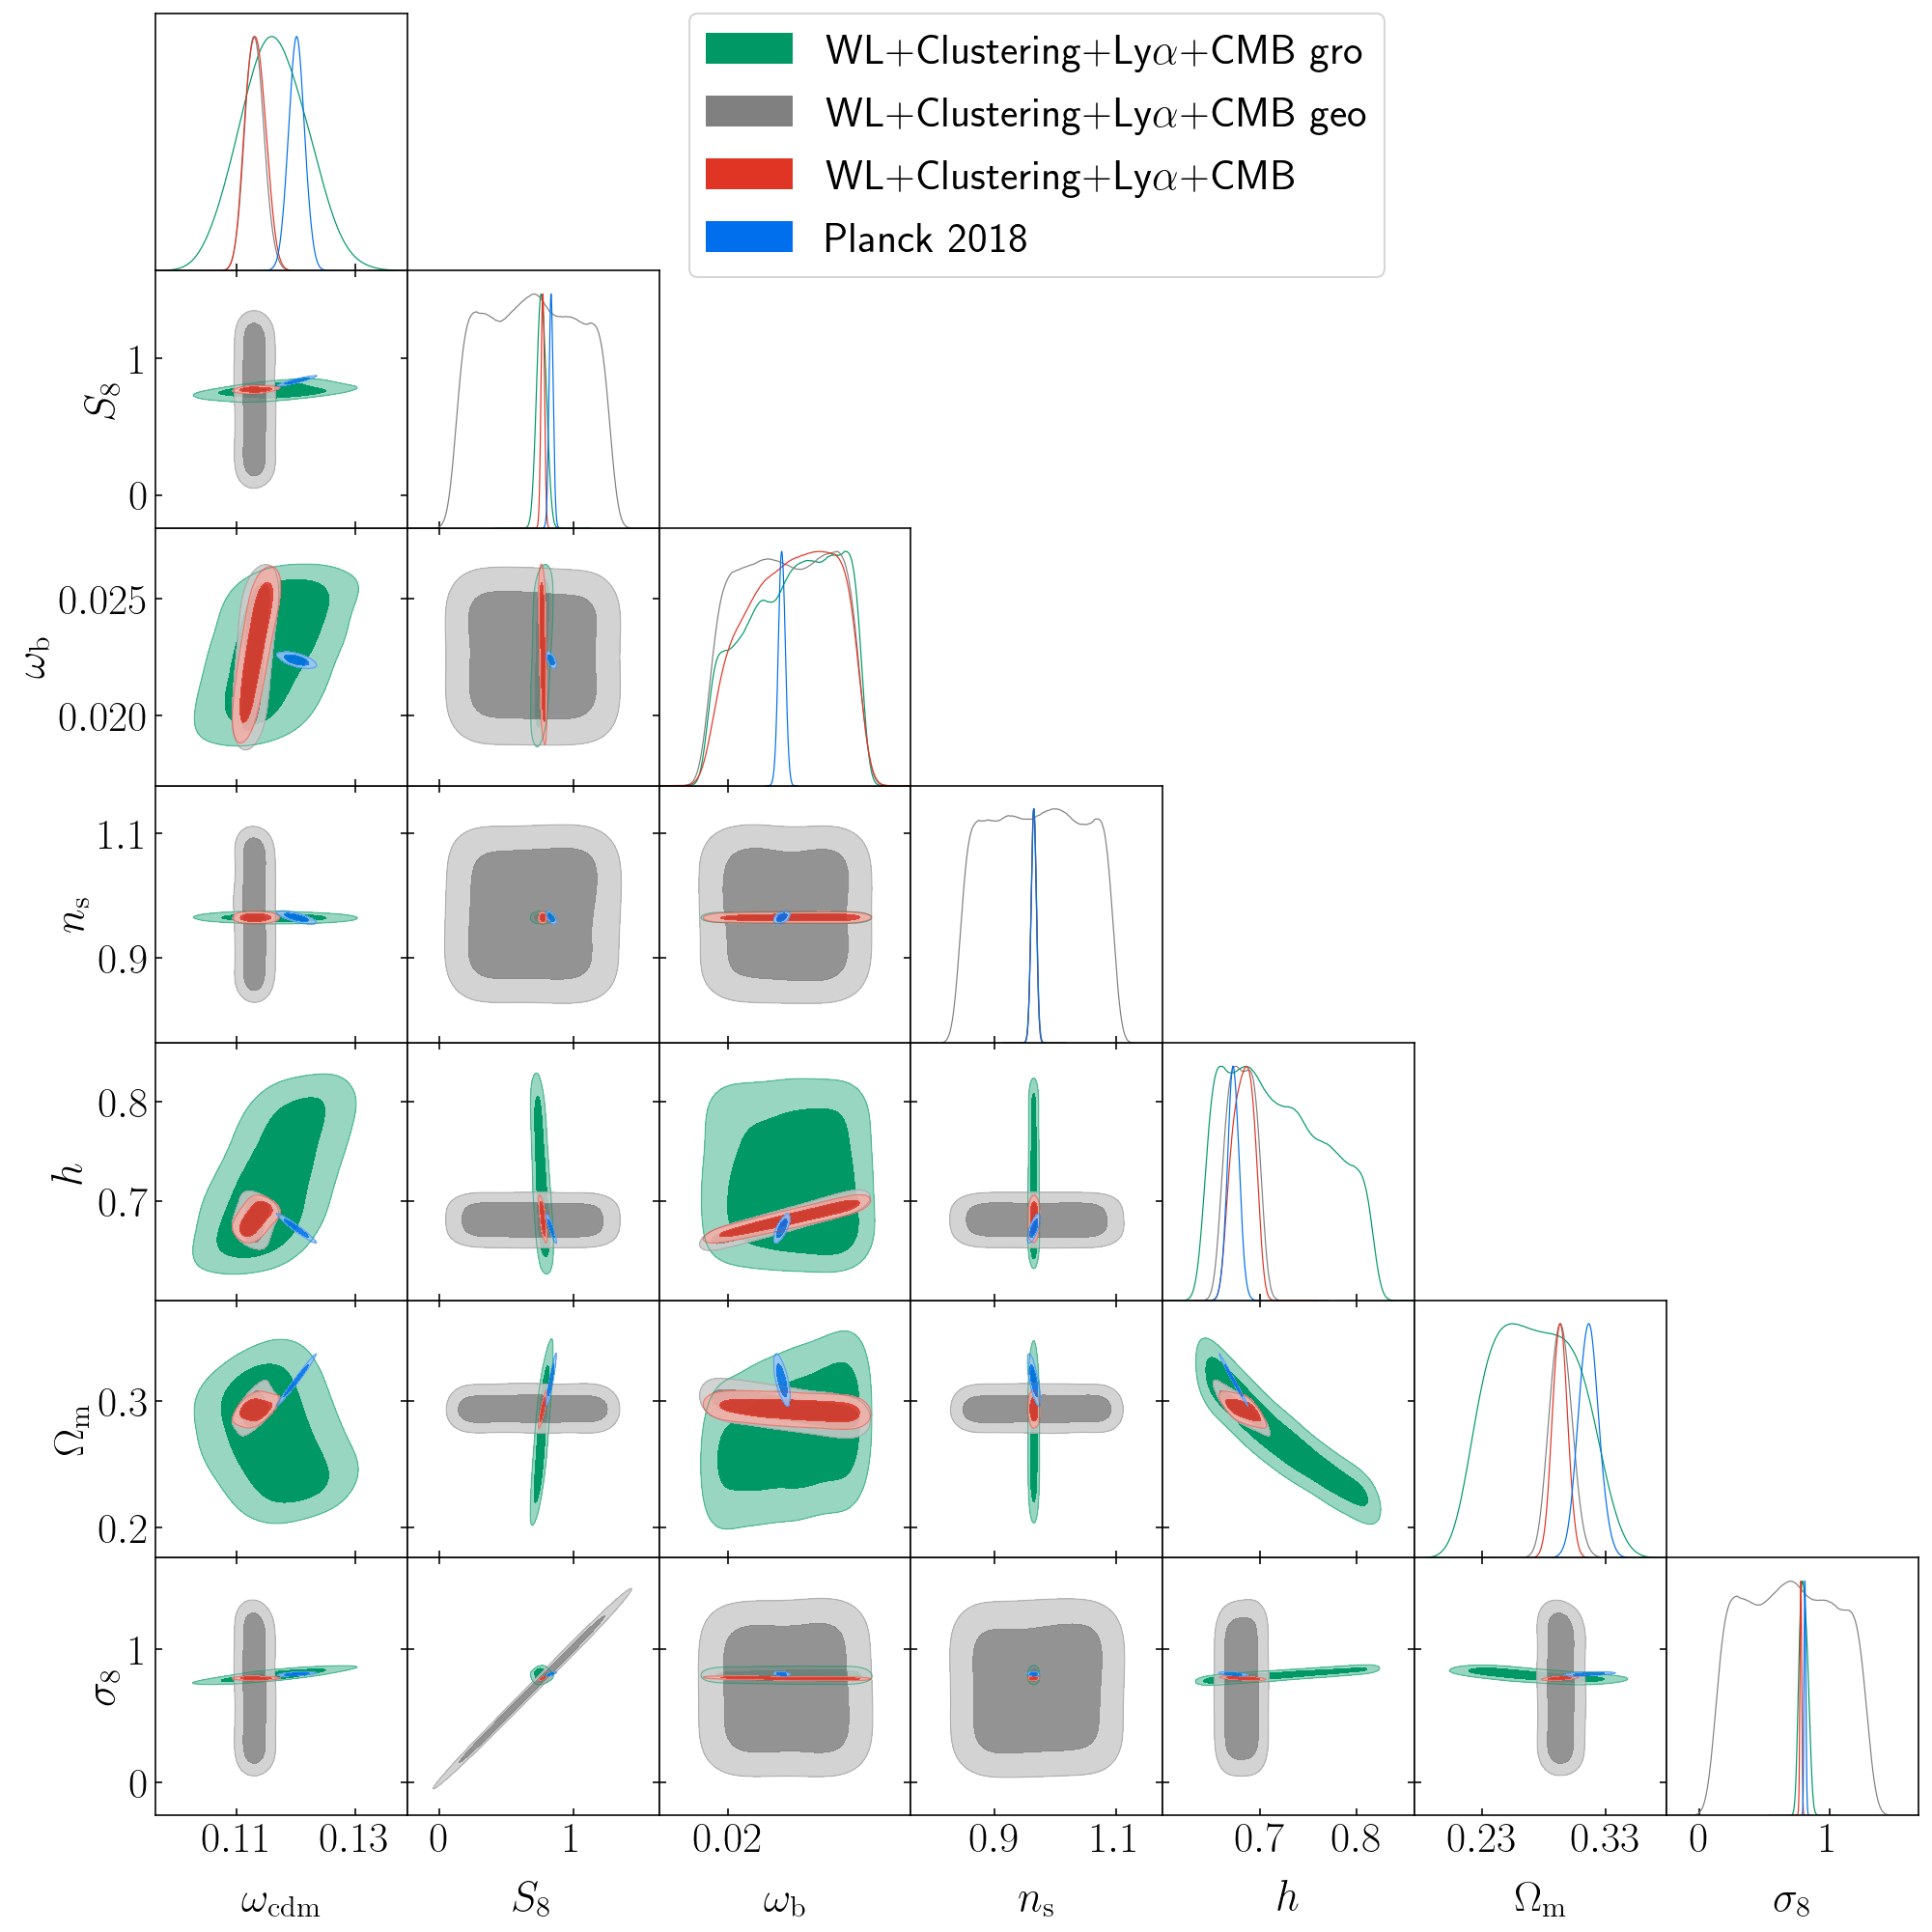

In [22]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.legend_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot(plot[name], filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/{}_triangle.pdf'.format(name))

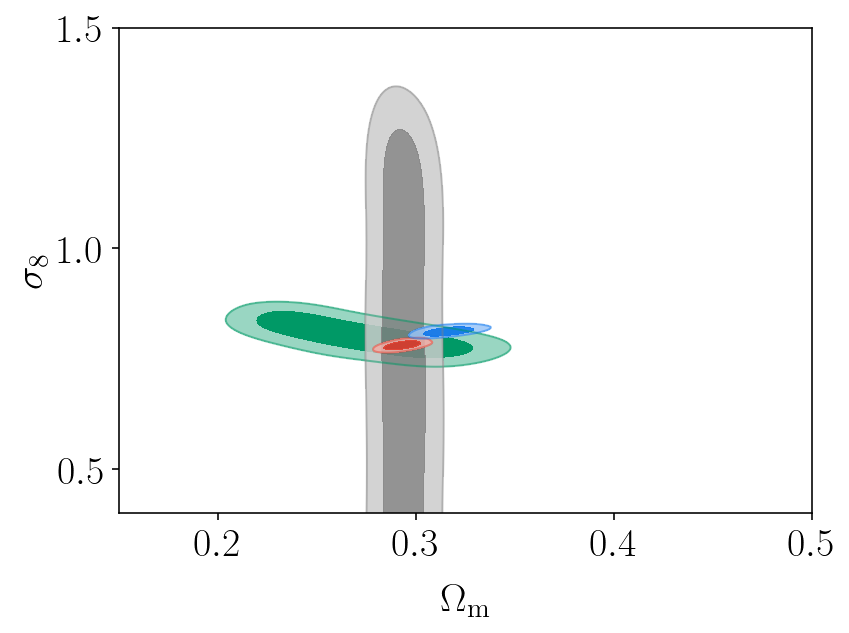

In [23]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d(plot[name], 'Omega_m', 'sigma8', filled=True, lims=lims1);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'_wmsig.png')

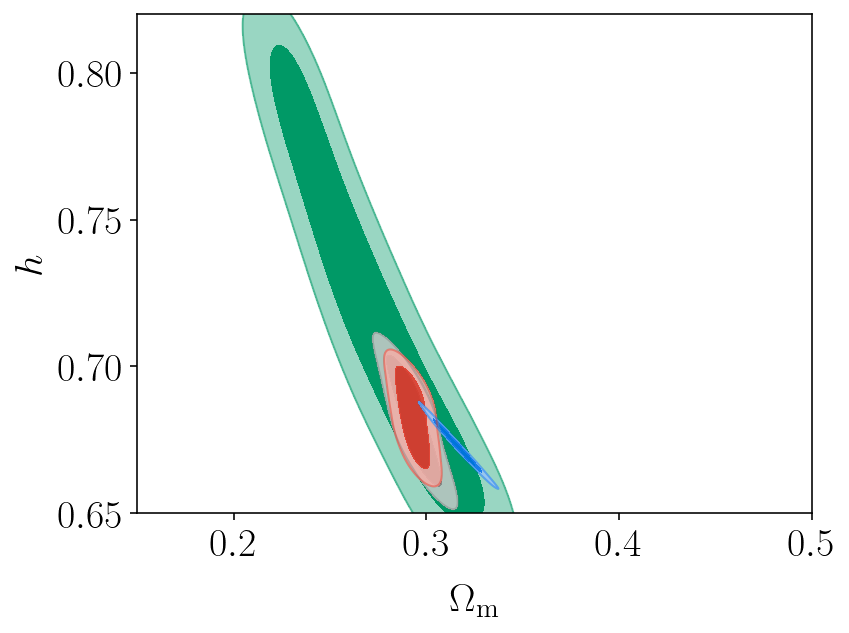

In [24]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d(plot[name],'Omega_m', 'h', filled=True, lims=lims2);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'_wmh.png')

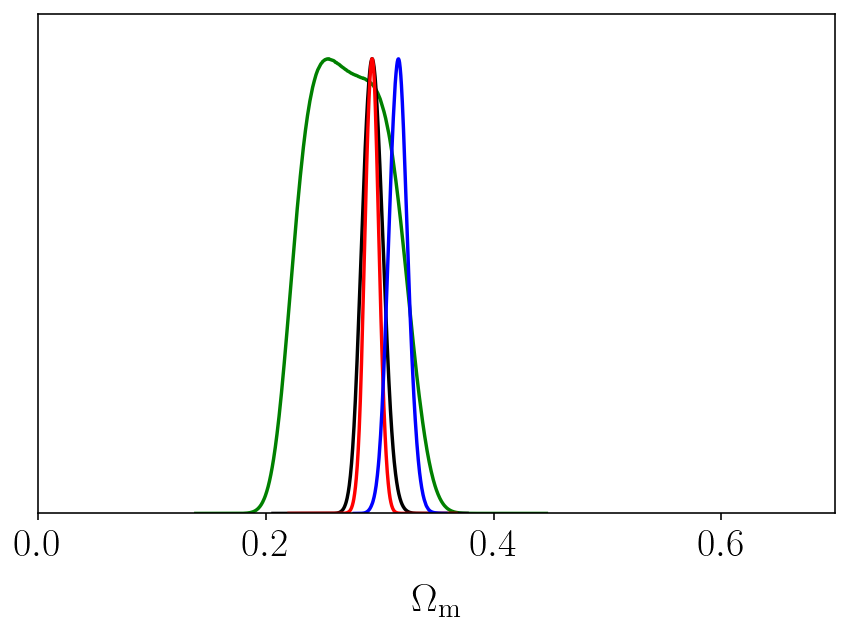

In [25]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_1d(plot[name],'Omega_m', 
          colors=['green', 'black', 'red','blue'],
          lims=lims3);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'wm'+'.png')

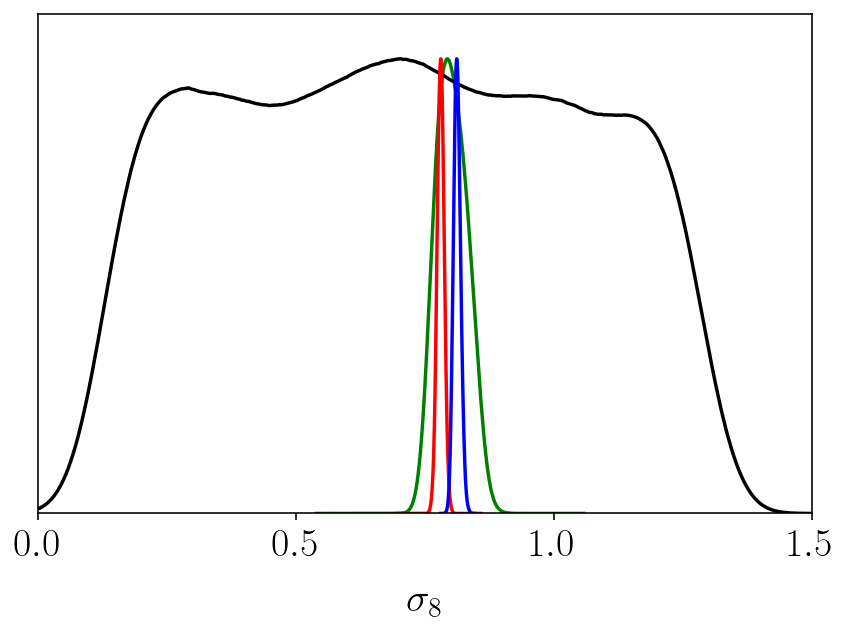

In [26]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_1d(plot[name], 'sigma8', 
          colors=['green', 'black', 'red','blue'], 
          lims=lims4);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'sig'+'.png')

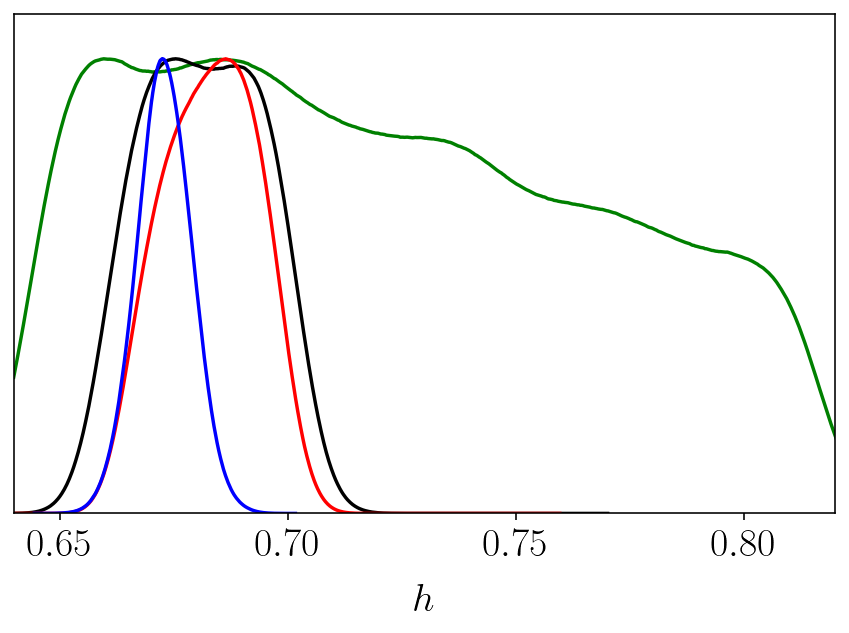

In [27]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_1d(plot[name], 'h',
          colors=['green', 'black', 'red','blue'],
          lims=lims5);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'h'+'.png')

# Appendix plots

In [28]:
plot = {'BOSS': [BOSS, K1K, K1K_Cl, planck],
         'Lya': [Lya, K1K, K1K_Ly, planck],
         'CMB':[CMB, K1K, K1K_CMB, planck]}

name = 'CMB'

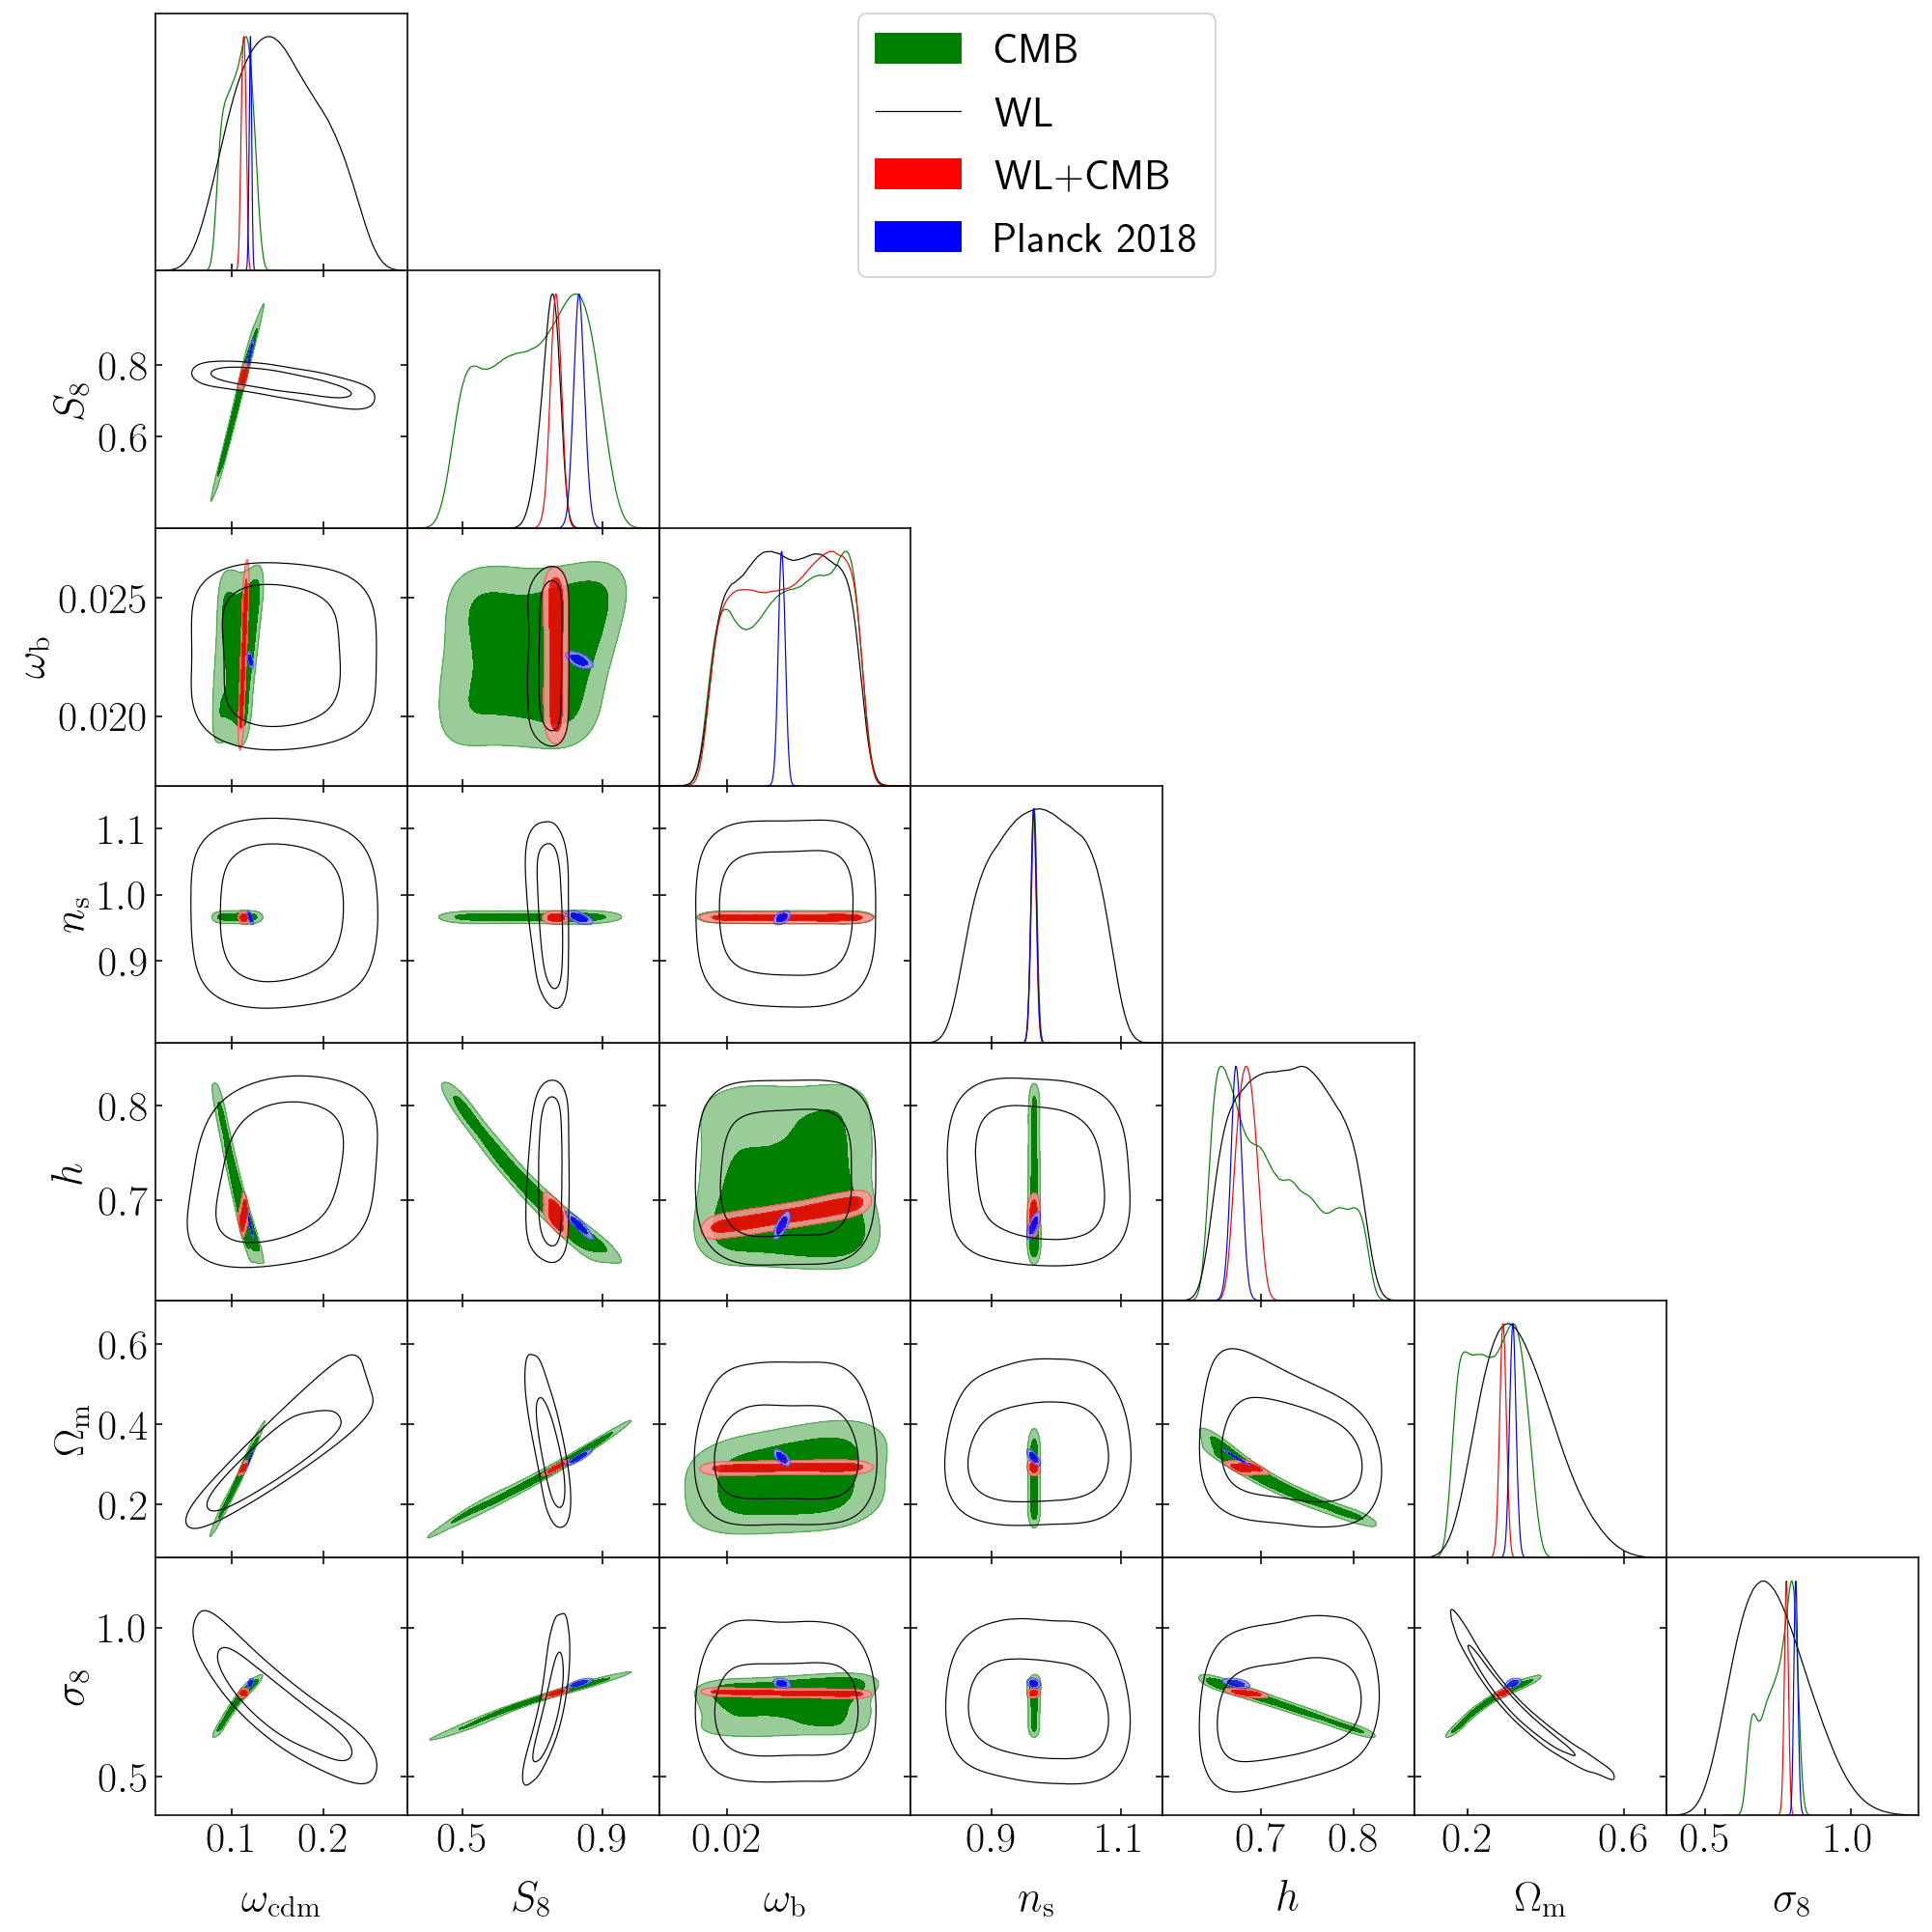

In [29]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.legend_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot(plot[name], colors=['green', 'black', 'red','blue'],
                contour_colors=['green', 'black', 'red','blue'],
                filled=[True, False, True, True])
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/{}_triangle.pdf'.format(name))

In [30]:
def munch_CMB_test(path):
    chain = np.loadtxt(path+'/chain_NS__accepted.txt')
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights = cols[0]
    param_cols = np.array([cols[11], cols[5], cols[10]])
    param_rows = np.transpose(param_cols)
    samples = MCSamples(samples=param_rows, names=[ 'ln10^{10}A_s', 'ns', '100theta_s'], 
                        labels=['ln10^{10}A_s', 'ns',  '100theta_star'],
                        label = 'CMB',
                        weights=weights, loglikes=loglikes)
    return samples

def munch_planck_test():
    chain = planck_tot
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights = cols[0]
    param_cols = np.array([cols[6], cols[7],  cols[56]]) #4
    param_rows = np.transpose(param_cols)
    samples = MCSamples(samples=param_rows, names=[ 'ln10^{10}A_s', 'ns', '100theta_s'], 
                        labels=[ 'ln10^{10}A_s', 'ns', '100theta_star'],
                        label = 'Planck',
                        weights=weights, loglikes=loglikes)
    return samples

In [31]:
CMB_test = munch_CMB_test('CMB')
planck_test = munch_planck_test()

Removed no burn in
Removed no burn in


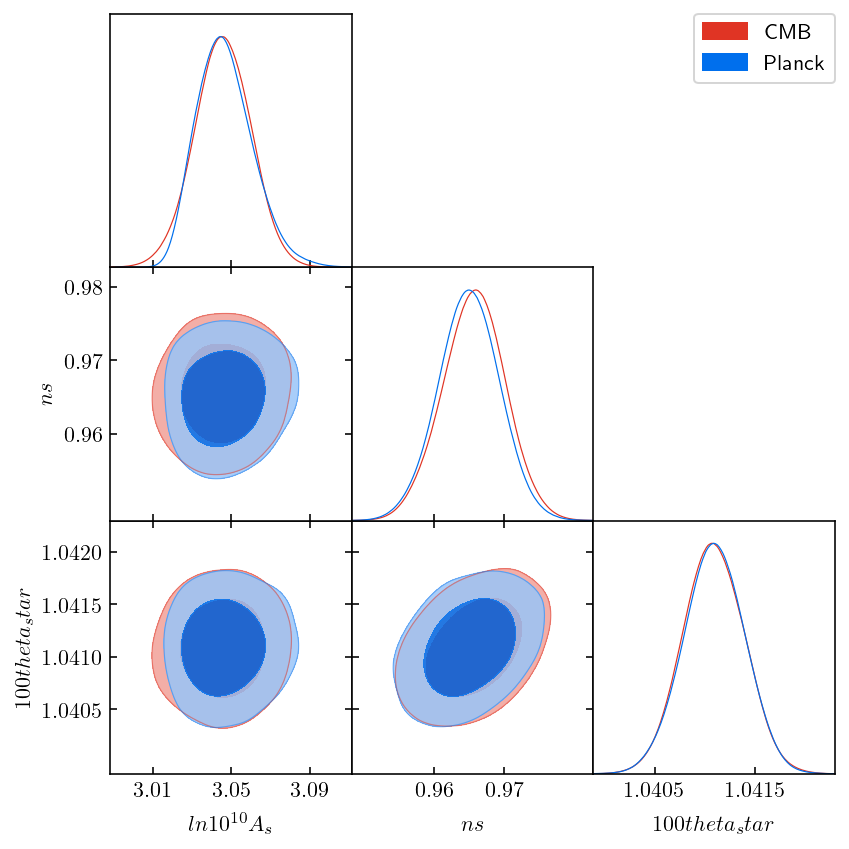

In [32]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 14
g.settings.legend_fontsize = 14
g.settings.axes_labelsize = 14
g.triangle_plot([CMB_test, planck_test], filled=True)

In [33]:
print(BOSS.getMargeStats())

Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
omega_cdm   1.7015279E-01  3.7085254E-02  1.2850397E-01  2.0506480E-01  two    1.0317180E-01  2.4388530E-01  two    9.0839000E-02  2.5294930E-01  two     \omega_{\rm{cdm}}
S_8         8.6697232E-01  6.6818608E-02  8.0152910E-01  9.3387340E-01  two    7.4001320E-01  9.9939680E-01  two    6.9928170E-01  1.0431930E+00  two     S_{\rm{8}}
omega_b     2.2566838E-02  2.0185286E-03  1.9565958E-02  2.5543793E-02  two    1.9181410E-02  2.5835930E-02  two    1.9036810E-02  2.5955640E-02  two     \omega_{\rm{b}}
n_s         9.7253414E-01  7.5076150E-02  8.6082500E-01  1.0845073E+00  two    8.4626490E-01  1.0935190E+00  two    8.4120080E-01  1.0991030E+00  two     n_{\rm{s}}
h           7.2297365E-01  3.2904705E-02  6.8797512E-01  7.5548436E-01  two    6.6058530E-01  7.8728150E-01  two    6.4824980E-01  8.00